# Question 1

1.

In [5]:
import pandas as pd
import numpy as np
import os

In [6]:
d = pd.read_excel("Restated_Bilateral_External_Portfolios.xlsx")

In [11]:
d_new = d[d.Investor_Name == 'United States'] #Create a new df with just the United States as the Investor

In [19]:
#Summary Statistics for Position Residency, Restatement TH Only, and Restatement Full.
# Select specific columns
stats_cols = d_new[['Position_Residency', 'Restatement_TH_Only','Restatement_Full']]  # Select columns the columns we want stats of

# Apply the describe() function to the selected columns
cols_description = stats_cols.describe()
cols_description

,Position_Residency,Restatement_TH_Only,Restatement_Full
count,2.129600e+04,2.129600e+04,2.129600e+04
mean,4.154237e+04,4.154237e+04,4.154237e+04
std,5.543225e+05,5.692445e+05,5.577167e+05
min,-4.430000e+02,-2.879760e+02,-1.740320e+02
25%,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.520000e+02,2.310000e+02,2.390000e+02
max,1.952983e+07,2.023065e+07,2.030565e+07


2.

In [20]:
d_new.head(10)

,Methodology,Year,Investor_Name,Investor,Asset_Class,Asset_Class_Code,Issuer_Name,Issuer,Position_Residency,Restatement_TH_Only,Restatement_Full,Restatement_Ex_Domestic,Restatement_Sales,Restatement_Sales_Ex_Domestic,Estimated_Common_Equity
0,Enhanced Fund Holdings,2007,United States,USA,Corporate Bonds,BC,Aruba,ABW,893.0,1.538563,1.538563,1.538563,979.276608,902.468778,NaN
1,Enhanced Fund Holdings,2007,United States,USA,Corporate Bonds,BC,Afghanistan,AFG,0.0,0.000000,0.000000,0.000000,185.009722,52.663592,NaN
2,Enhanced Fund Holdings,2007,United States,USA,Corporate Bonds,BC,Angola,AGO,0.0,0.000000,0.000000,0.000000,1696.386972,687.965341,NaN
3,Enhanced Fund Holdings,2007,United States,USA,Corporate Bonds,BC,Anguilla,AIA,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
4,Enhanced Fund Holdings,2007,United States,USA,Corporate Bonds,BC,Albania,ALB,1.0,1.000000,1.000000,1.000000,479.290802,175.856567,NaN
5,Enhanced Fund Holdings,2007,United States,USA,Corporate Bonds,BC,Andorra,AND,0.0,0.000000,0.000000,0.000000,99.088346,34.914999,NaN
6,Enhanced Fund Holdings,2007,United States,USA,Corporate Bonds,BC,Netherlands Antilles,ANT,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
7,Enhanced Fund Holdings,2007,United States,USA,Corporate Bonds,BC,United Arab Emirates,ARE,2967.0,3066.855620,2872.757476,2872.757476,5881.409423,2827.061279,NaN
8,Enhanced Fund Holdings,2007,United States,USA,Corporate Bonds,BC,Argentina,ARG,1790.0,1790.000000,1430.987915,1430.987915,16301.191158,7829.435298,NaN
9,Enhanced Fund Holdings,2007,United States,USA,Corporate Bonds,BC,Armenia,ARM,1.0,1.000000,1.000000,1.000000,369.409413,113.673222,NaN


In [26]:
asset_class_freq = d_new['Asset_Class'].value_counts()

In [27]:
asset_class_freq

Corporate Bonds            7986
Common Equity              7986
Government Bonds           2662
Asset-Backed Securities    2662
Name: Asset_Class, dtype: int64

3. 

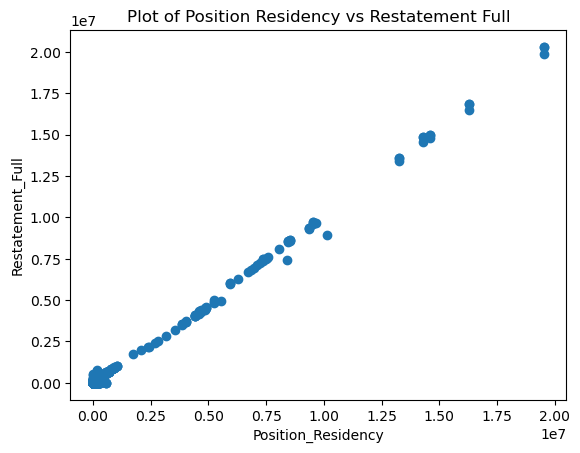

<Figure size 640x480 with 0 Axes>

In [35]:
import matplotlib.pyplot as plt
# Scatter plot of Position Residency and Restatement Full
plt.scatter(d_new['Position_Residency'],d_new['Restatement_Full'])
plt.xlabel('Position_Residency')  # Set x-axis label
plt.ylabel('Restatement_Full')  # Set y-axis label
plt.title('Plot of Position Residency vs Restatement Full')  # Set plot title
plt.show()  # Display the plot
plt.savefig('Plot1.png')

4.

In [36]:
import seaborn as sns

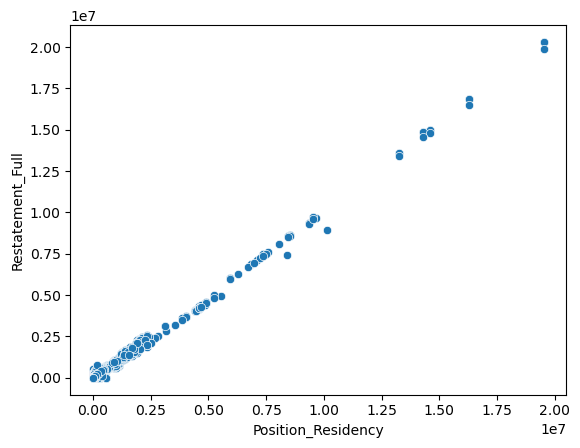

In [39]:
sns.scatterplot(x='Position_Residency',y='Restatement_Full',data=d)
plt.savefig('Plot2.png')

5.

In [44]:
import statsmodels.api as sm

# Fit regression model
X = sm.add_constant(d_new['Restatement_Full'])  # Add constant to predictor variable
model = sm.OLS(d_new['Position_Residency'], X)  # Ordinary Least Squares model
results = model.fit()  # Fit the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     Position_Residency   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 6.615e+06
Date:                Tue, 25 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:13:11   Log-Likelihood:            -2.5073e+05
No. Observations:               21296   AIC:                         5.015e+05
Df Residuals:                   21294   BIC:                         5.015e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              319.1139    215.770  

6.


In [46]:
N = d_new.count()
N

Methodology                      21296
Year                             21296
Investor_Name                    21296
Investor                         21296
Asset_Class                      21296
Asset_Class_Code                 21296
Issuer_Name                      21296
Issuer                           21296
Position_Residency               21296
Restatement_TH_Only              21296
Restatement_Full                 21296
Restatement_Ex_Domestic          21296
Restatement_Sales                15972
Restatement_Sales_Ex_Domestic    15972
Estimated_Common_Equity              0
dtype: int64

In [49]:
d_new_sub = d_new.sample(N[1],replace=True)
d_new_sub

,Methodology,Year,Investor_Name,Investor,Asset_Class,Asset_Class_Code,Issuer_Name,Issuer,Position_Residency,Restatement_TH_Only,Restatement_Full,Restatement_Ex_Domestic,Restatement_Sales,Restatement_Sales_Ex_Domestic,Estimated_Common_Equity
104236,Issuance,2008,United States,USA,Corporate Bonds,BC,Puerto Rico,PRI,0.0,0.000000,1121.351929,0.000000,3.214240e+03,591.663782,NaN
37886,Fund Holdings,2014,United States,USA,Corporate Bonds,BC,Monaco,MCO,0.0,0.000000,0.000000,0.000000,1.341897e+02,43.666932,NaN
186524,Issuance,2011,United States,USA,Corporate Bonds,BC,Russian Federation,RUS,154.0,16680.553301,17626.946115,16882.828073,5.138594e+04,15313.863328,NaN
305202,Issuance,2015,United States,USA,Common Equity,E,China,CHN,98380.0,446560.923138,454065.782754,444942.020968,1.340800e+06,674498.802816,NaN
10215,Fund Holdings,2007,United States,USA,Corporate Bonds,BC,Curaçao,CUW,3553.0,0.000000,0.000000,0.000000,6.623369e+00,6.623369,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26282,Fund Holdings,2011,United States,USA,Asset-Backed Securities,BSF,Mozambique,MOZ,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN
186696,Issuance,2011,United States,USA,Common Equity,E,Kyrgyzstan,KGZ,0.0,36.588032,36.588032,36.588032,9.774309e+02,865.286409,NaN
6260,Enhanced Fund Holdings,2016,United States,USA,Common Equity,E,Togo,TGO,52.0,52.000000,53.408769,53.408769,2.487156e+02,161.073505,NaN
26049,Fund Holdings,2011,United States,USA,Government Bonds,BG,New Caledonia,NCL,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN


In [50]:
# Fit new regression model using the subsample
X = sm.add_constant(d_new_sub['Restatement_Full'])  # Add constant to predictor variable
model = sm.OLS(d_new_sub['Position_Residency'], X)  # Ordinary Least Squares model
results = model.fit()  # Fit the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     Position_Residency   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 8.206e+06
Date:                Tue, 25 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:21:36   Log-Likelihood:            -2.5123e+05
No. Observations:               21296   AIC:                         5.025e+05
Df Residuals:                   21294   BIC:                         5.025e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              474.5220    220.865  

Here we see that the subsample regression fit is exactly the same as the previous sample .997. This makes sense since the data used is the same and thus the regression fits the the data to the same degree. But the coefficient on Restatement_Full is slightly different. Now .987 as opposed to .9923

# Question 2

1.

In [1]:
import pandas as pd
import numpy as np
import os

In [3]:
d = pd.read_csv("Players.csv")

In [5]:
d.head(10)

,PLAYER_NAME,TEAM_ID,PLAYER_ID,SEASON
0,Royce O'Neale,1610612762,1626220,2019
1,Bojan Bogdanovic,1610612762,202711,2019
2,Rudy Gobert,1610612762,203497,2019
3,Donovan Mitchell,1610612762,1628378,2019
4,Mike Conley,1610612762,201144,2019
5,Joe Ingles,1610612762,204060,2019
6,Ed Davis,1610612762,202334,2019
7,Jeff Green,1610612762,201145,2019
8,Dante Exum,1610612762,203957,2019
9,Emmanuel Mudiay,1610612762,1626144,2019


In [6]:
 freq_table = d['PLAYER_NAME'].value_counts()

In [11]:
freq_table = pd.DataFrame(freq_table)

In [12]:
freq_table

,PLAYER_NAME
Chris Johnson,18
Ish Smith,17
Garrett Temple,16
Corey Brewer,16
Ersan Ilyasova,15
...,...
Marcus Allen,1
Devontae Cacok,1
Daulton Hommes,1
Luka Samanic,1


In [22]:
#Define a function to take player name input and return other players who played for the same years
def find_players(player_name, df):
    
    # Find the years in which the input player was active
    player_years = set(df[df['PLAYER_NAME'] == player_name]['SEASON'])
    
    if len(player_years) > 0:
    
        # Find all players who were active during the same years
        active_players = df[df['SEASON'].isin(player_years)]['PLAYER_NAME'].unique()
    
        # Create a new DataFrame containing the active players' names
        result_df = pd.DataFrame({'PLAYER_NAME': active_players})
        
        #Return the active players in the dataframe.
        return result_df

    else:
        print('Player does not exist.')
        

find_players('Devontae Cacok' , d)


,PLAYER_NAME
0,Royce O'Neale
1,Bojan Bogdanovic
2,Rudy Gobert
3,Donovan Mitchell
4,Mike Conley
...,...
613,Thomas Welsh
614,Anthony Bennett
615,Devyn Marble
616,Hassani Gravett


# Question 3

1.

In [27]:
import pandas as pd
import numpy as np
import os

In [28]:
d = pd.read_excel("TFP_Temprature.xlsx")

In [29]:
d.head()

,Year,Country,TFP_Index,Land_Index,Capital_Index,Temp_Anomalies
0,1962,United States,1.655562,-1.066736,0.590293,0.11
1,1963,United States,4.472855,1.134239,0.470755,0.12
2,1964,United States,2.134946,-0.386559,0.273507,-0.14
3,1965,United States,0.983604,-0.253554,-0.109552,-0.07
4,1966,United States,1.612377,-0.393762,-0.412873,-0.01


In [31]:
#Summary Statistics for TFP Index, Land Index, Capital Index and Temp Anomalies
# Select specific columns
stats_cols = d[['TFP_Index', 'Land_Index','Capital_Index', 'Temp_Anomalies']]  # Select columns the columns we want stats of

# Apply the describe() function to the selected columns
cols_description = stats_cols.describe()
cols_description

,TFP_Index,Land_Index,Capital_Index,Temp_Anomalies
count,116.000000,116.000000,116.000000,116.000000
mean,1.239728,0.072847,0.963103,0.371207
std,5.785397,2.096559,2.402319,0.293892
min,-18.159816,-4.887363,-4.003855,-0.140000
25%,-1.418109,-0.882407,-0.867453,0.120000
50%,1.554636,-0.030328,0.743322,0.355000
75%,4.563169,0.529282,2.569294,0.620000
max,20.677359,11.928160,7.527753,0.990000


2.

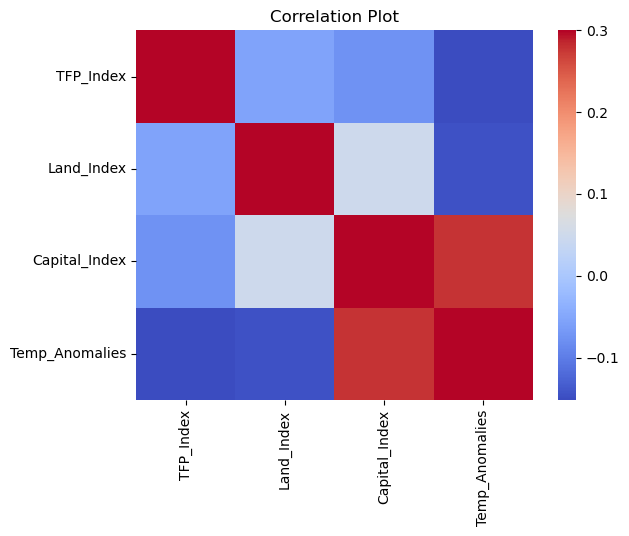

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = stats_cols.corr()

#Hide the upper tirangle of the correlation matrix by masking it out
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create a correlation plot using seaborn
sns.heatmap(corr_matrix, cmap='coolwarm',vmax=.3, annot=False)

# Set the title of the plot
plt.title('Correlation Plot')

# Show the plot
plt.show()


3.

In [51]:
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

# create a train-test split
train_data, test_data = train_test_split(d, test_size=0.2, random_state=123)

# fit quantile regression on training data for each quantile, in this case I decided to use the main three from the summary statistics
quantiles = [0.25, 0.5, 0.75]
models = [] #empty df to store regressions in
for q in quantiles:
    model = smf.quantreg('TFP_Index ~ Temp_Anomalies', train_data) #define a quantile regression model with a given formula and dataset
    result = model.fit(q=q) #fit the model to the data
    models.append(result) #store the regression

# predict on test data for each model
for i, q in enumerate(quantiles):
    test_data[q] = models[i].predict(test_data)

# calculate forecast accuracy for each quantile
for q in quantiles:
    mae = abs(test_data['TFP_Index'] - test_data[q]).mean()
    print(f'Mean absolute error for q={q}:', mae)



Mean absolute error for q=0.25: 4.4666057389256375
Mean absolute error for q=0.5: 3.8600440870137334
Mean absolute error for q=0.75: 5.211940945188112


In [48]:
test_data.head(10)

,Year,Country,TFP_Index,Land_Index,Capital_Index,Temp_Anomalies,0.25,0.5,0.75
4,1966,United States,1.612377,-0.393762,-0.412873,-0.01,-1.020167,2.256656,6.204123
89,1993,Australia,1.825627,0.486573,-1.328913,0.28,-1.305306,1.576691,4.977415
53,2015,United States,-3.154453,0.268921,1.686367,0.93,-1.944411,0.052630,2.227898
100,2004,Australia,20.677359,-2.935117,5.394008,0.58,-1.600278,0.873278,3.708407
28,1990,United States,3.883236,0.050017,-1.192344,0.45,-1.472457,1.178090,4.258311
105,2009,Australia,7.845410,3.833663,-0.150821,0.64,-1.659272,0.732596,3.454606
59,1963,Australia,0.547018,0.285004,2.502625,0.12,-1.147988,1.951844,5.654219
65,1969,Australia,-2.198857,-2.464366,3.716679,0.11,-1.138156,1.975291,5.696519
90,1994,Australia,-9.978059,3.065560,1.375832,0.35,-1.374133,1.412561,4.681313
33,1995,United States,-4.831190,-0.028778,-1.171887,0.47,-1.492121,1.131196,4.173710
